In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

### Dataset prep

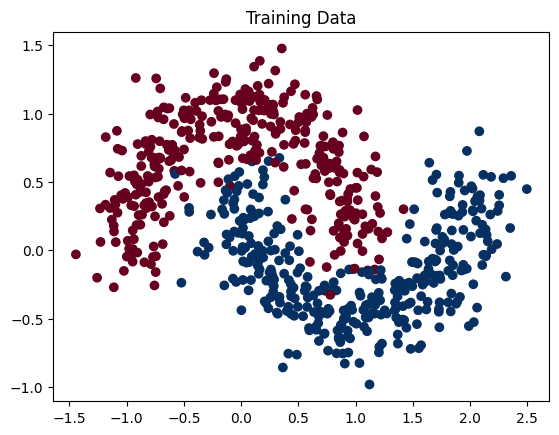

In [6]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()

### Model building

In [7]:
def build_model(activation_function="sigmoid", loss_function="binary_crossentropy"):
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss=loss_function, metrics=["accuracy"])
    return model

### Training and evaluating model

10/10 [==============================] - 0s 3ms/step


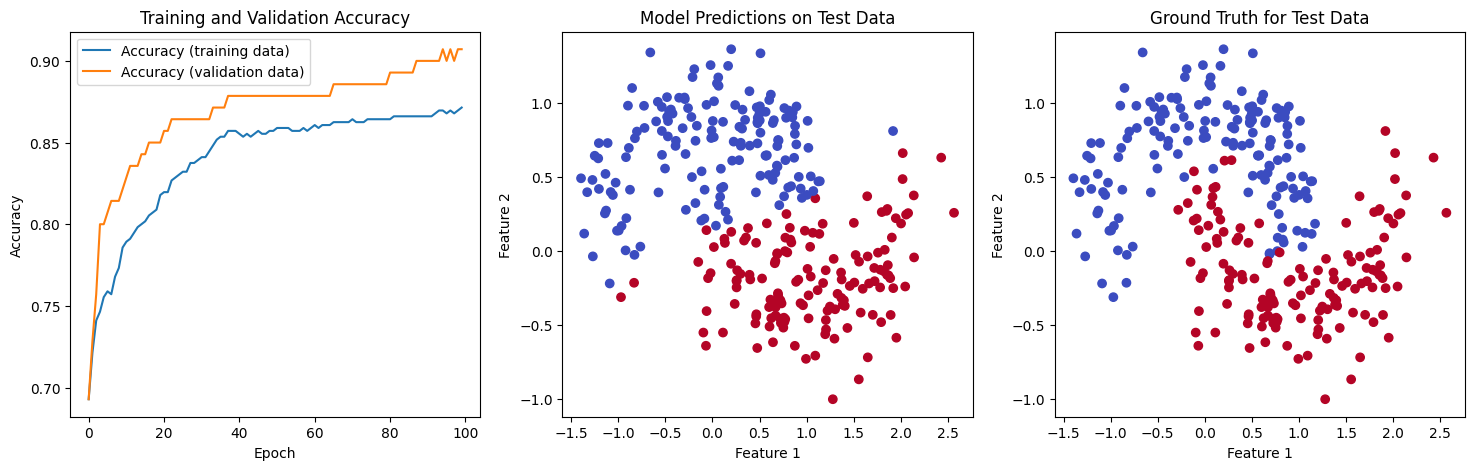

Test Loss: 0.0764
Test Accuracy: 0.8933


In [9]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100):
    history = model.fit(
        X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2
    )

    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Plotting training history
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history["accuracy"], label="Accuracy (training data)")
    plt.plot(history.history["val_accuracy"], label="Accuracy (validation data)")
    plt.title("Training and Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()

    # Predicting on test data
    predictions = model.predict(X_test) > 0.5

    # Plotting model predictions
    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
    plt.title("Model Predictions on Test Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.title("Ground Truth for Test Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.show()

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")


# Example of using the function with a specific activation and loss function
model = build_model(activation_function="tanh", loss_function="mean_squared_error")
train_and_evaluate_model(model, epochs=100)